In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/house-rent-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\BineshMahato\.cache\kagglehub\datasets\iamsouravbanerjee\house-rent-prediction-dataset\versions\9


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:

# Specify the path to your dataset
file_path = r"C:\Users\BineshMahato\.cache\kagglehub\datasets\iamsouravbanerjee\house-rent-prediction-dataset\versions\9\House_Rent_Dataset.csv"

# Load the dataset into a Pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())


    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

In [4]:
# View basic info about the dataset
data.info()

# Check for missing values
print(data.isnull().sum())

# Basic statistics
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0

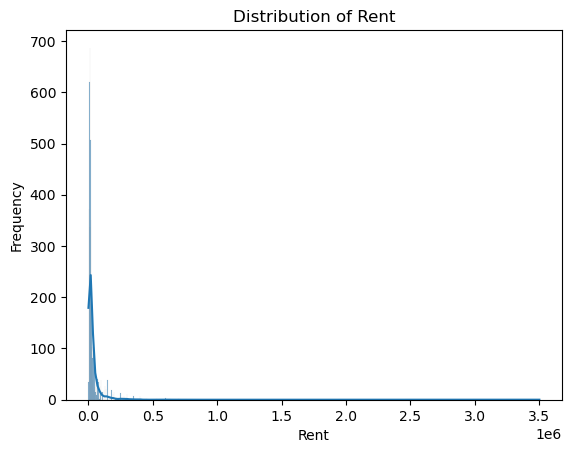

In [5]:
sns.histplot(data['Rent'], kde=True)
plt.title('Distribution of Rent')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()


In [6]:
# Drop columns that are irrelevant for prediction
data = data.drop(['Posted On', 'Area Locality', 'Point of Contact'], axis=1, errors='ignore')
print(data.columns)
# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Handle missing values (if any remain)
data = data.dropna()  # Simple approach: drop rows with missing values


Index(['BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom'],
      dtype='object')


In [7]:
# Features and target
X = data.drop('Rent', axis=1)  # All columns except 'Rent'
y = data['Rent']              # Target variable

# Check shapes
print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (4746, 493)
Target shape: (4746,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)


Training data size: (3796, 493)
Testing data size: (950, 493)


In [9]:
# Initialize the model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

# Print model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [ 1.28841947e+03  3.33853819e+01  1.05120695e+04  9.70461630e+03
 -1.14186912e+04 -4.36179107e-07 -1.82684744e+04 -1.70412849e+04
  4.27958903e+03  1.20834585e+04  3.04216219e+03  4.54242581e-07
  6.93911737e+03 -3.98653356e-07 -1.00504513e+04 -6.00884862e+03
  4.81599052e+03  1.74677077e+04  5.97379708e+03  6.29870670e+03
  5.92607583e+03  1.70431926e+03 -1.18716646e+04  1.38402408e+03
  3.62735891e+03 -1.92904366e+04  5.01141147e+03  1.74543041e+04
 -3.97387194e+03  3.34650454e+03  1.07462410e+05 -1.36778046e+04
 -9.26621754e+03 -1.42945637e+04 -1.54814974e+04 -1.52738755e+04
 -2.77827516e+04 -2.11498427e+04 -3.23431950e+04  3.07591108e-09
  4.35473812e+03 -1.76000580e+04  1.70335744e+05  1.01177889e+05
  3.75753779e+04  1.20852949e+04 -2.02117217e+04 -1.11551565e+04
  5.09201956e+03  2.55972037e+04 -3.35374969e+04  5.23581258e+04
  1.76349847e+04 -3.41907802e+03 -2.80654227e+04 -1.76284044e+04
  1.04893039e+04  3.10045767e+04  1.27880044e+05 -4.91287644e+04
 -2.5

In [10]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 2123634474.059363
R² Score: 0.4671439681546844


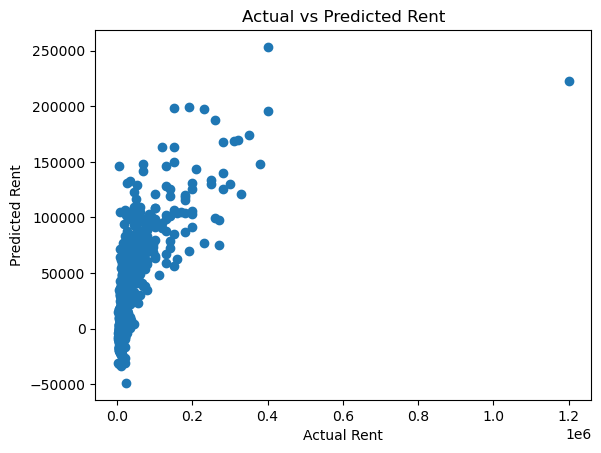

In [11]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Actual vs Predicted Rent')
plt.show()


In [12]:
import joblib
joblib.dump(model, 'house_rent_model.pkl')


['house_rent_model.pkl']

In [20]:
import pickle

# Example of columns used during training (these should match the columns you used to train your model)
trained_columns = ['BHK', 'Size', 'Area Type_Super Area', 'City_Chennai', 'City_Delhi', 'City_Hyderabad', 'City_Kolkata', 'Tenant Preferred_Bachelors']

# Save the trained columns to a .pkl file
with open('trained_columns.pkl', 'wb') as f:
    pickle.dump(trained_columns, f)

print("Trained columns have been saved to 'trained_columns.pkl'")


Trained columns have been saved to 'trained_columns.pkl'


In [13]:

# Load your trained model
loaded_model = joblib.load("house_rent_model.pkl")

try:
    # Extract feature names
    trained_columns = loaded_model.feature_names_in_
    print("Trained columns:", trained_columns)
except AttributeError:
    print("The model does not have the 'feature_names_in_' attribute.")


Trained columns: ['BHK' 'Size' 'Bathroom' 'Floor_1 out of 1' 'Floor_1 out of 10'
 'Floor_1 out of 11' 'Floor_1 out of 12' 'Floor_1 out of 13'
 'Floor_1 out of 14' 'Floor_1 out of 15' 'Floor_1 out of 16'
 'Floor_1 out of 19' 'Floor_1 out of 2' 'Floor_1 out of 20'
 'Floor_1 out of 22' 'Floor_1 out of 24' 'Floor_1 out of 3'
 'Floor_1 out of 35' 'Floor_1 out of 4' 'Floor_1 out of 5'
 'Floor_1 out of 6' 'Floor_1 out of 7' 'Floor_1 out of 8'
 'Floor_1 out of 9' 'Floor_10 out of 10' 'Floor_10 out of 11'
 'Floor_10 out of 12' 'Floor_10 out of 13' 'Floor_10 out of 14'
 'Floor_10 out of 15' 'Floor_10 out of 16' 'Floor_10 out of 18'
 'Floor_10 out of 19' 'Floor_10 out of 20' 'Floor_10 out of 22'
 'Floor_10 out of 23' 'Floor_10 out of 24' 'Floor_10 out of 25'
 'Floor_10 out of 28' 'Floor_10 out of 31' 'Floor_10 out of 32'
 'Floor_10 out of 37' 'Floor_11 out of 11' 'Floor_11 out of 12'
 'Floor_11 out of 13' 'Floor_11 out of 14' 'Floor_11 out of 15'
 'Floor_11 out of 16' 'Floor_11 out of 17' 'Floor_

In [14]:
import pickle

# Replace `model` with your trained model object
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [16]:
print(loaded_model.feature_names_in_)


['BHK' 'Size' 'Bathroom' 'Floor_1 out of 1' 'Floor_1 out of 10'
 'Floor_1 out of 11' 'Floor_1 out of 12' 'Floor_1 out of 13'
 'Floor_1 out of 14' 'Floor_1 out of 15' 'Floor_1 out of 16'
 'Floor_1 out of 19' 'Floor_1 out of 2' 'Floor_1 out of 20'
 'Floor_1 out of 22' 'Floor_1 out of 24' 'Floor_1 out of 3'
 'Floor_1 out of 35' 'Floor_1 out of 4' 'Floor_1 out of 5'
 'Floor_1 out of 6' 'Floor_1 out of 7' 'Floor_1 out of 8'
 'Floor_1 out of 9' 'Floor_10 out of 10' 'Floor_10 out of 11'
 'Floor_10 out of 12' 'Floor_10 out of 13' 'Floor_10 out of 14'
 'Floor_10 out of 15' 'Floor_10 out of 16' 'Floor_10 out of 18'
 'Floor_10 out of 19' 'Floor_10 out of 20' 'Floor_10 out of 22'
 'Floor_10 out of 23' 'Floor_10 out of 24' 'Floor_10 out of 25'
 'Floor_10 out of 28' 'Floor_10 out of 31' 'Floor_10 out of 32'
 'Floor_10 out of 37' 'Floor_11 out of 11' 'Floor_11 out of 12'
 'Floor_11 out of 13' 'Floor_11 out of 14' 'Floor_11 out of 15'
 'Floor_11 out of 16' 'Floor_11 out of 17' 'Floor_11 out of 18'
 'F

In [17]:
all_features = [
    'BHK', 'Size', 'Area Type_Super Area', 'City_Chennai', 
    'City_Delhi', 'City_Hyderabad', 'City_Kolkata', 
    'Tenant Preferred_Bachelors', 'Floor_1 out of 2', 'Floor_1 out of 15'
]
sample_input = pd.DataFrame(columns=all_features)

# Add your actual input values
sample_input.loc[0] = [2, 1000, 1, 0, 0, 0, 0, 1, 0, 0]


In [24]:
import pandas as pd
import pickle

# Load the trained model
with open('trained_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Load the trained columns
with open('trained_columns.pkl', 'rb') as f:
    trained_columns = pickle.load(f)

# Sample input data (you can modify this based on your prediction scenario)
sample_input = pd.DataFrame({
    'BHK': [2],
    'Size': [1000],
    'Area Type_Super Area': [1],
    'City_Chennai': [0],
    'City_Delhi': [0],
    'City_Hyderabad': [0],
    'City_Kolkata': [0],
    'Tenant Preferred_Bachelors': [1]
    # Assume this data has all necessary features but may be missing some, 
    # like floors or other dynamically created columns
})

# Ensure the input has all the columns used during training
# This step ensures that the input data has all the columns in the same order as during training
# Missing columns will be filled with 0
sample_input = sample_input.reindex(columns=trained_columns, fill_value=0)

# Check that the input data matches the expected format
print("Prepared Input Data:")
print(sample_input)

# Predict the rent using the trained model
predicted_rent = loaded_model.predict(sample_input)

# Output the prediction
print("Predicted Rent:", predicted_rent[0])


Prepared Input Data:
   BHK  Size  Area Type_Super Area  City_Chennai  City_Delhi  City_Hyderabad  \
0    2  1000                     1             0           0               0   

   City_Kolkata  Tenant Preferred_Bachelors  
0             0                           1  
Predicted Rent: 19631.590027525886
